<a href="https://colab.research.google.com/github/phmehta95/-skli-event-display/blob/main/Properties_of_the_FT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Properties of the Fourier Transform

1. generate a synthetic signal consisting of a single Gaussian centred half-way through the data vector. Use a vector of 100 elements, and start with a Gaussian with standard deviation of 20.

2. Fourier transform the data. What does that look like?

3. What happens when a different standard deviation is used for the Gaussian?

4. Generate a synthetic signal consisting of a top hat function, centered half-way through the data vector. Start with a width of 20. Perform the Fourier Transform - what does it look like? What happens with different widths for the top hat?

5. try editing the Fourier transform of the top hat function above by zeroing the values close to the origin, and transforming back. What effect does that have on the signal in the original domain?

6. try zeroing all values other than those close to the origin. What effect does that have on the signal in the original domain in this case?

7. try shifting the top hat along the data vector. What happens to the Fourier transform in this case?

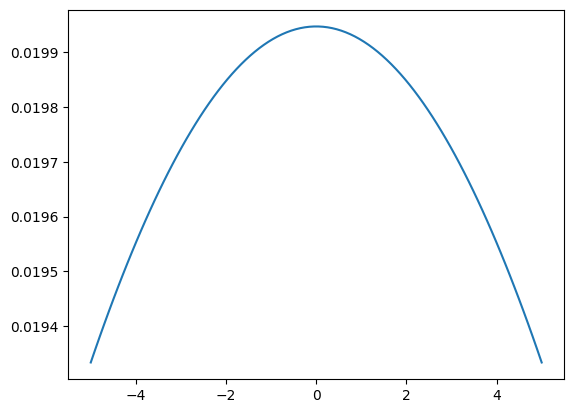

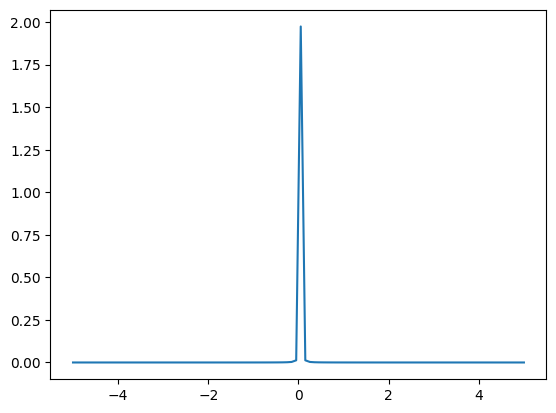

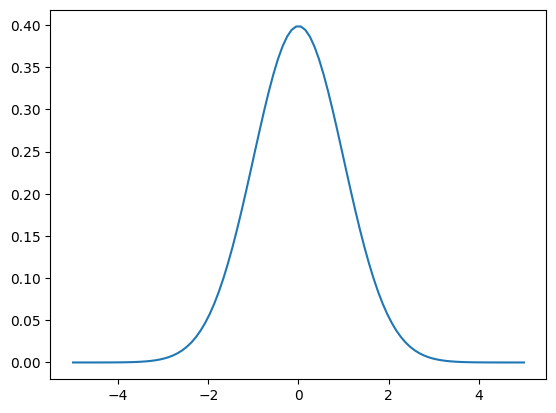

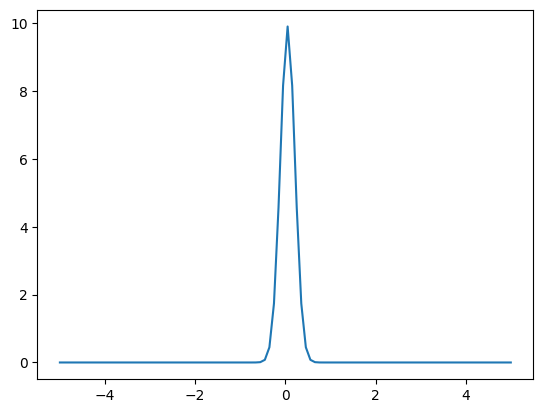

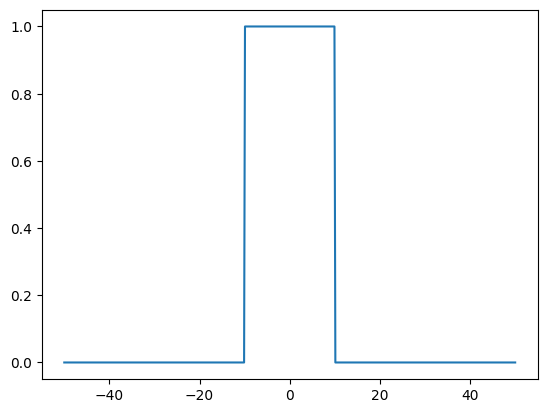

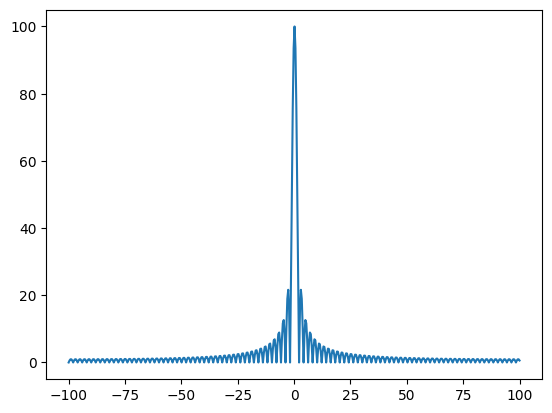

[-0.5   -0.498 -0.496 -0.494 -0.492 -0.49  -0.488 -0.486 -0.484 -0.482
 -0.48  -0.478 -0.476 -0.474 -0.472 -0.47  -0.468 -0.466 -0.464 -0.462
 -0.46  -0.458 -0.456 -0.454 -0.452 -0.45  -0.448 -0.446 -0.444 -0.442
 -0.44  -0.438 -0.436 -0.434 -0.432 -0.43  -0.428 -0.426 -0.424 -0.422
 -0.42  -0.418 -0.416 -0.414 -0.412 -0.41  -0.408 -0.406 -0.404 -0.402
 -0.4   -0.398 -0.396 -0.394 -0.392 -0.39  -0.388 -0.386 -0.384 -0.382
 -0.38  -0.378 -0.376 -0.374 -0.372 -0.37  -0.368 -0.366 -0.364 -0.362
 -0.36  -0.358 -0.356 -0.354 -0.352 -0.35  -0.348 -0.346 -0.344 -0.342
 -0.34  -0.338 -0.336 -0.334 -0.332 -0.33  -0.328 -0.326 -0.324 -0.322
 -0.32  -0.318 -0.316 -0.314 -0.312 -0.31  -0.308 -0.306 -0.304 -0.302
 -0.3   -0.298 -0.296 -0.294 -0.292 -0.29  -0.288 -0.286 -0.284 -0.282
 -0.28  -0.278 -0.276 -0.274 -0.272 -0.27  -0.268 -0.266 -0.264 -0.262
 -0.26  -0.258 -0.256 -0.254 -0.252 -0.25  -0.248 -0.246 -0.244 -0.242
 -0.24  -0.238 -0.236 -0.234 -0.232 -0.23  -0.228 -0.226 -0.224 -0.222
 -0.22

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


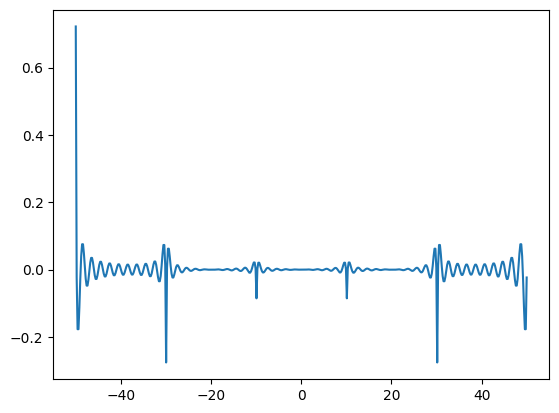

In [75]:
import numpy as np
import matplotlib.pyplot as plt

#1.#Plotting Gaussian
def gaussian(x,mu,sig):
   return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
       )

x_values = np.linspace(-5, 5, 100)

plt.plot(x_values, gaussian(x_values, 0, 20))

plt.show()


#2.#Doing Fourier transform
##np.fft.fftshift -> this is needed because it shifts the
plt.plot(x_values, np.fft.fftshift(np.abs(np.fft.fft(gaussian(x_values, 0, 20)))))
plt.show()

#3.#####Changing to a smaller SD#######################

plt.plot(x_values, gaussian(x_values, 0, 1))
plt.show()

#Doing Fourier transform
plt.plot(x_values, np.fft.fftshift(np.abs(np.fft.fft(gaussian(x_values, 0, 1)))))
plt.show()


#4.###Plot tophat function#####
# Define domain
x = np.linspace(-50, 50, 500)

# Define tophat function
width = 20
center = 0
tophat = np.where(np.abs(x - center) <= width / 2, 1, 0)#y=1 inside interval, 0 outside

###Plotting figure#####
plt.plot(x,tophat)
plt.show()

#Fourier transform of tophat
x_values_tophat = np.linspace(-100, 100, 500)
y = np.fft.fftshift(np.abs(np.fft.fft(tophat)))
plt.plot(x_values_tophat,np.fft.fftshift(np.abs(np.fft.fft(tophat))))
plt.show()

#As you increase the width of the top hat, the sinc function (sinx/x) of the resulting Fourier transform becomes narrow.
#This demonstrates that signals that are wide in time are narrow in frequency space.

#5.##############Zeroing out frequencies near origin########
freqs = np.fft.fftfreq(len(x))
freqs_shifted = np.fft.fftshift(freqs)
print(freqs_shifted)
cutoff = 0.1  # frequency range to zero out
mask = np.abs(freqs_shifted) < cutoff
fft_shifted_filtered = y.copy()
fft_shifted_filtered[mask] = 0 #Zero-ing out everything in the mask range (less than 0.1)


#filtered = np.fft.ifftshift(np.abs(fft_shifted_filtered))
inversefft_tophat = np.fft.ifft(np.fft.ifftshift(np.abs(fft_shifted_filtered)))
plt.plot(x, inversefft_tophat)
plt.show()

########Removing low frequency content (<1) emphasises sharp oscillations (high frequency content) in the inverse transform
